## itchat

Happened to come across a blog  https://blog.csdn.net/Lee20093905/article/details/79052795 about scrap info about wechat friends. Wechat is the largest social media platform for Chinese, and a lot of my non Chinese friends are also using it. Super fun to play with!!!

Starting Code based on  https://blog.csdn.net/Lee20093905/article/details/79052795. Author 'H2OSIR', thank you mate!
Right now I adapted his code with slight modification. I plan to conduct further analysis for fun.

Itchat offers API for easier access.

[Itchat API](https://itchat.readthedocs.io/zh/latest/api/)


## Install itchat

Type in code below in terminal:

## Login to wechat

Import the package 
A QR code will pop up. Scan to log in.

In [1]:
import itchat
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as HAHA


## Analyse friends Info

## Friends

In [2]:
friends = itchat.get_friends(update=True)

It returns a list of dictionaries. Each item in the list corresponds to the information for a user. The first one is the user him/herself.

In [3]:
friends[0]

<User: {'MemberList': <ContactList: []>, 'UserName': '@b7ca9652a0a8d1c59e797c3d9dbaac9ace900d3dc89678d536a3beee16650075', 'City': 'Cambridge', 'DisplayName': '', 'PYQuanPin': 'HAHA', 'RemarkPYInitial': '', 'Province': 'England', 'KeyWord': '', 'RemarkName': '', 'PYInitial': 'HAHA', 'EncryChatRoomId': '', 'Alias': '', 'Signature': '哟吼', 'NickName': 'HAHA', 'RemarkPYQuanPin': '', 'HeadImgUrl': '/cgi-bin/mmwebwx-bin/webwxgeticon?seq=689931275&username=@b7ca9652a0a8d1c59e797c3d9dbaac9ace900d3dc89678d536a3beee16650075&skey=@crypt_838c226a_64ae5f1795d75934b2851ce440c5b09d', 'UniFriend': 0, 'Sex': 1, 'AppAccountFlag': 0, 'VerifyFlag': 0, 'ChatRoomId': 0, 'HideInputBarFlag': 0, 'AttrStatus': 33655397, 'SnsFlag': 49, 'MemberCount': 0, 'OwnerUin': 0, 'ContactFlag': 3, 'Uin': 2328451382, 'StarFriend': 0, 'Statues': 0, 'WebWxPluginSwitch': 0, 'HeadImgFlag': 1, 'IsOwner': 0}>

## Explore Sex Ratio

In [4]:
male = 0
female = 0
other = 0
# friends[0] corresponds to the user him.herself, so we need to start with 1
for i in friends[1:]:
    sex = i['Sex']  # 2 is female， 1 is male
    if sex == 1:
        male += 1
    elif sex == 2:
        female += 1
    else:
        other += 1
# Calculate total number of friends
total = len(friends[1:])
print('Number of friends：', total)
print('Proportion of male：%2f%%' % (float(male) / total * 100))
print('Proportion of female：%2f%%' % (float(female) / total * 100))
print('Proportion of unknown：%2f%%' % (float(other) / total * 100))

Number of friends： 1137
Proportion of male：49.692172%
Proportion of female：43.183817%
Proportion of unknown：7.124011%


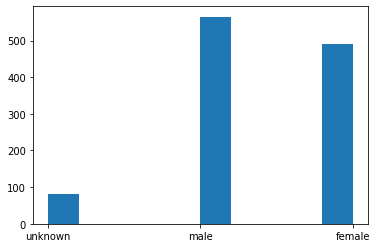

In [8]:
arr = [1] * male  # Male
arr1 = [2]*female # Female
arr2 = [0] * other    #Unknown gender
arr.extend(arr1)
arr.extend(arr2)
from matplotlib import pyplot as plt
import numpy as np
plt.hist(arr)
plt.xticks(np.arange(0,3, 1.0),labels= ['unknown','male','female'])
plt.show()


## All at once

We were looking at features one by one above, but we could have seleted them all out at once.

In [9]:
# Get Friend's nickname, province, city, what's up and make a panda dataframe
import pandas as pd

# friends[0]是自己的信息，因此我们要从[1:]开始
data = pd.DataFrame()
columns=['NickName', 'Sex', 'Province', 'City', 'Signature']
for col in columns:
    val = []
    for i in friends[1:]:
        val.append(i[col])
    data[col] = pd.Series(val)

## City Distribution

/Users/qha/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128054 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/qha/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128054 missing from current font.
  font.load_char(ord(s), flags=flags)


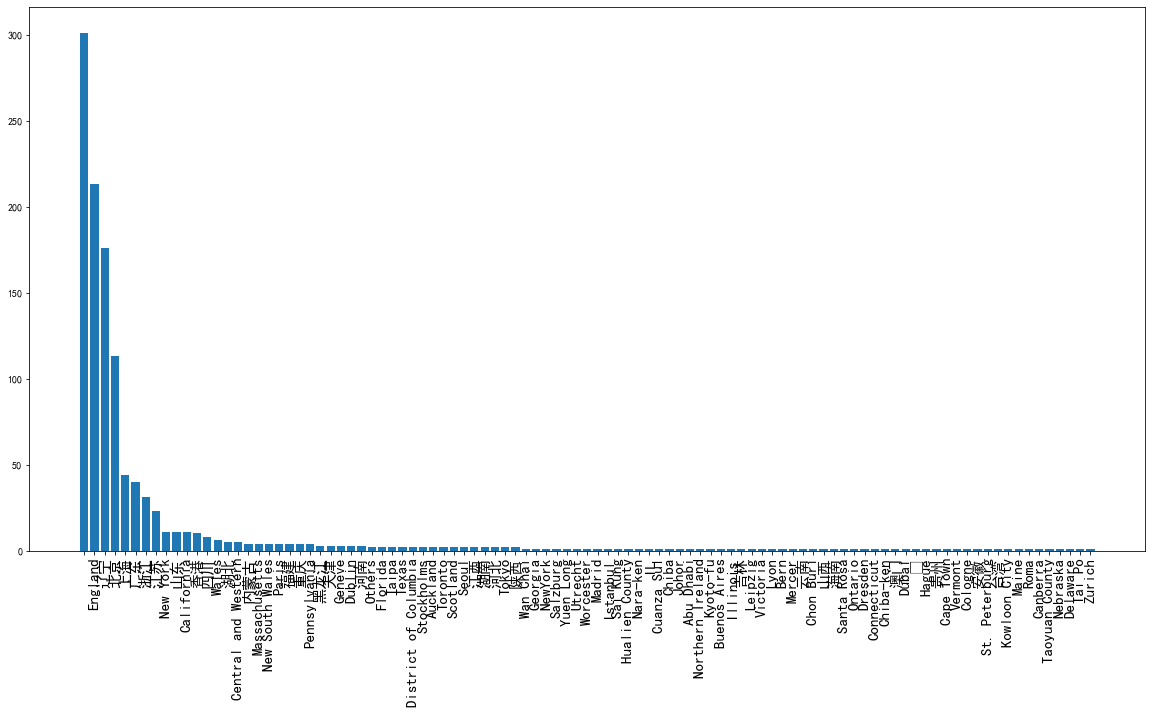

In [10]:
plt.figure(figsize=(20, 10))
plt.rcParams['font.sans-serif']=['SimHei']    # This is for dispaying Chinese properly, 
                                              #see https://blog.csdn.net/u014465934/article/details/80377470 for more details
plt.bar(data['Province'].value_counts().index,data['Province'].value_counts())  # 选择柱状图，而不是直方图。
plt.xticks(rotation=90,fontsize = 15)     # 横坐标旋转90度
plt.show()


Let us see where my friends live in England

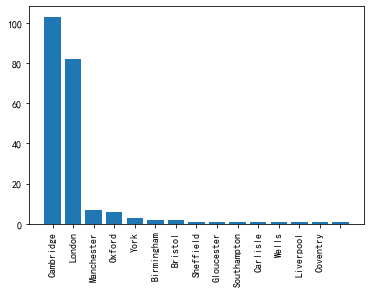

In [11]:
# 查看好友的分布情况
gd = data[data['Province']=='England']['City']
plt.bar(gd.value_counts().index,gd.value_counts())
plt.xticks(rotation=90)
plt.show()

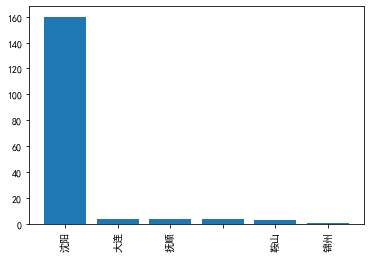

In [12]:
gd = data[data['Province']=='辽宁']['City']
plt.bar(gd.value_counts().index,gd.value_counts())
plt.xticks(rotation=90)
plt.show()

And where they live in Beijing

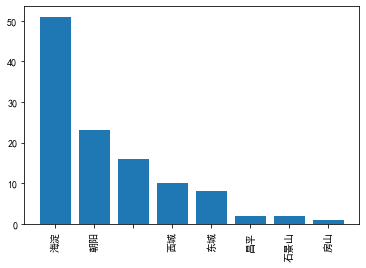

In [13]:
gd = data[data['Province']=='北京']['City']
plt.bar(gd.value_counts().index,gd.value_counts())
plt.xticks(rotation=90)
plt.show()

## What's up WORD CLOUD

The biggest fun comes when we analyse what people say in their what's up. What is on my friend's mind?

In [14]:
import re
siglist = []
for i in data['Signature']:
    signature = i.strip().replace('emoji','').replace('span','').replace('class','')
    rep = re.compile('1f\d+\w*|[<>/=]')  
    signature = rep.sub('', signature)
    siglist.append(signature)
text = ''.join(siglist)


Let us see the raw texts

In [15]:
text

'要么改变它，要么适应它。寂寞不是病，痛起来要人命嗯嗯在最好的年纪遇到你，青春没有辜负自己\'\'\'\'VCBBM PIN:2AFD5A66是我莫大的幸福。l love Belinda,xddd行文简浅显，做事诚平恒I can eat glass and not hurt myself清く 正しく 美しく你好 我是李太珍19要高冷(￣▽￣)请不是新生的老同学9月份再申请加群哈 " "BACON?万人如海一身藏Manners Maketh Man.Make me awesome again!上上下下左右左右BABA对接学长姐 请电邮成绩单至info@trigoedu.comSome birds are not meant to be caged..Feeling like a potato人生不过如此！请放平你的心态，放低你的姿态。āayyyyy职业梦求职顾问，擅长投行求职。加我要帮我转发朋友圈~ " "的 " "腿子世事艰 气如山开心快乐每一天！之所以幸福，不是因为拥有的多，而是因为要求的少……OYOMW晚上十点睡觉，早睡早起！头像是派大星的姐姐，她叫Sam Star。她是个穿bra的软妹子。为知，为已，为人上善若水 厚德载物up up down down left right left right B A B A好,你有30条命了 " "🏻 " 2728"小J " "☆〜（ゝ。∂） " 2728"幼儿园毕业了。健康和谐！If you are ever in trouble, don\'t try to be brave, just run.You were never second.Mon-Thu:11am-2:30pm 5pm-10pm Fri-Sat:11am-2:30pm 5pm-10:30pm剑桥大学2016北京大学2018What is any ocean but a multitude of drops?群星璀璨，做最好的自己好好学习,不打游戏，收拾房间无垠霄汉 不过英雄的瞭望“结庐在人境，而无车马喧。问君何能尔？心远地自偏。”不努力工作，哪来美好生活嘘でいい、答えてそれでも世界は美しい9座奔驰Vito,07554422688等待与希望meow～down to earth为人民服务珍惜拥有What can be more special than t

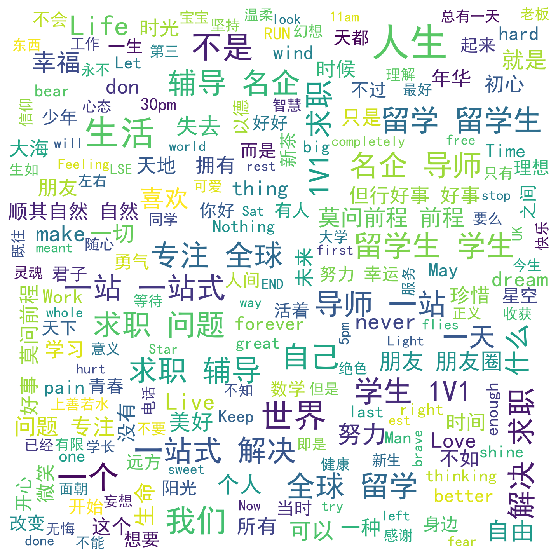

In [18]:

import jieba # pip install if u have not

word_list = jieba.cut(text, cut_all=True)
word_space_split = ' '.join(word_list)

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import PIL.Image as Image
plt.figure(figsize=(20, 10))

font ='./SimHei.ttf'

my_wordcloud = WordCloud(background_color="white", max_words=200,
                         max_font_size=100, font_path=font, width =1400, height =1400,  random_state=42, margin=2).generate(word_space_split)
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()



Wordcloud is mostly about finding jobs or applying for unis....   <br>
I probably have added too many DreamBig Career consultants as contacts.   <br>
What a sad life!!!!